## Parte 4 - Clusterização - iFood

---
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">


### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

### Carregando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
df_orders = pd.read_csv('/content/drive/MyDrive/MBA/notebooks/Aulas/df_orders.csv')

In [ ]:
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


In [ ]:
df_orders.shape

(492138, 43)

In [ ]:
df_orders.merchant_dish_type.value_counts()

,count
merchant_dish_type,
Lanches,145585
Comida Brasileira,89551
Pizza,82781
Comida Japonesa,35804
Comida Saudável,19283
Açaí,16123
Comida Chinesa,12154
Comida Italiana,11530
Marmita,9285


# Segmentação por Tipo de Comida

**<span style="color:blue"></span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` crie a ABT de Segmentação computando a frequência normalizada.

Salve o resultado na variável `abt_seg_tipo_comida`


In [ ]:
abt_seg_tipo_comida = pd.crosstab(df_orders.customer_id, df_orders.merchant_dish_type, normalize='index').reset_index()
abt_seg_tipo_comida.head()

merchant_dish_type,customer_id,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
abt_seg_tipo_comida.shape

(30079, 58)

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue"></span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


In [ ]:
!pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
X = abt_seg_tipo_comida.drop('customer_id', axis=1).copy()
X.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


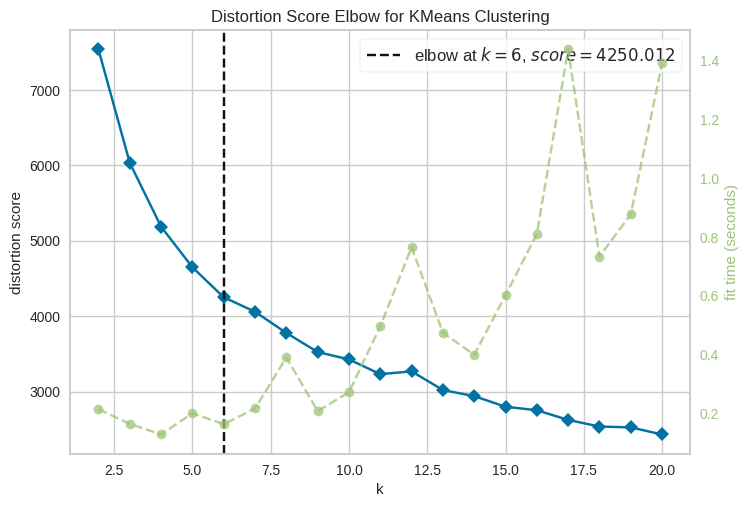

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=15)
visualizer = KElbowVisualizer(kmeans, k=(2,21))
visualizer.fit(X)
visualizer.show()

**<span style="color:blue"></span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

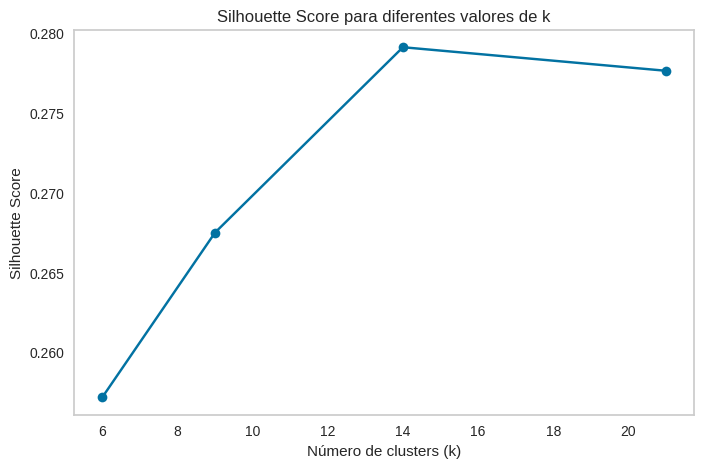

In [ ]:
silhouette_scores = []
k_values = (6, 9, 14, 21)
for k in k_values:
    kmeans_silhouette = KMeans(n_clusters=k, random_state=15)
    labels =  kmeans_silhouette.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para diferentes valores de k")
plt.grid()
plt.show()

In [ ]:
best_k = k_values[np.argmax(silhouette_scores)]
print(f"O melhor número de clusters é: {best_k}")

O melhor número de clusters é: 14


**<span style="color:blue">[RESPOSTA]:</span>**
 a quantidade sugerida por yellowBrick foi K=6 (seis clusters). <br>
 Para avaliar se 6 era um bom número rodei o Silhouette Score para analisar a pontuação de cada K com 6, 9, 14 e 21 . A quantidade de features dessa ABT sugere que 6 clusters não seria o adequado para separação, então analisando com a pontuação de silhouette score o melhor número de cluster seria 14 (score=0.279).  Fazendo a comparação com 14 clusters com as 14 categoria de alimentos mais pedidas, mas poderiasmos trabalhar com as 11 mais pedidas. Na análise observamos uma distribuição mais precisa em relação a preferência de cada cluster, com a maioria tendo indicador superior a 0.5 e com um número maior de 0.9. 4 clusters, esses só consomem 1 tipo de comida, um indicativo da melhor classificação. Isso pode ser observado nas imagens abaixo:  

 !4 clusters:

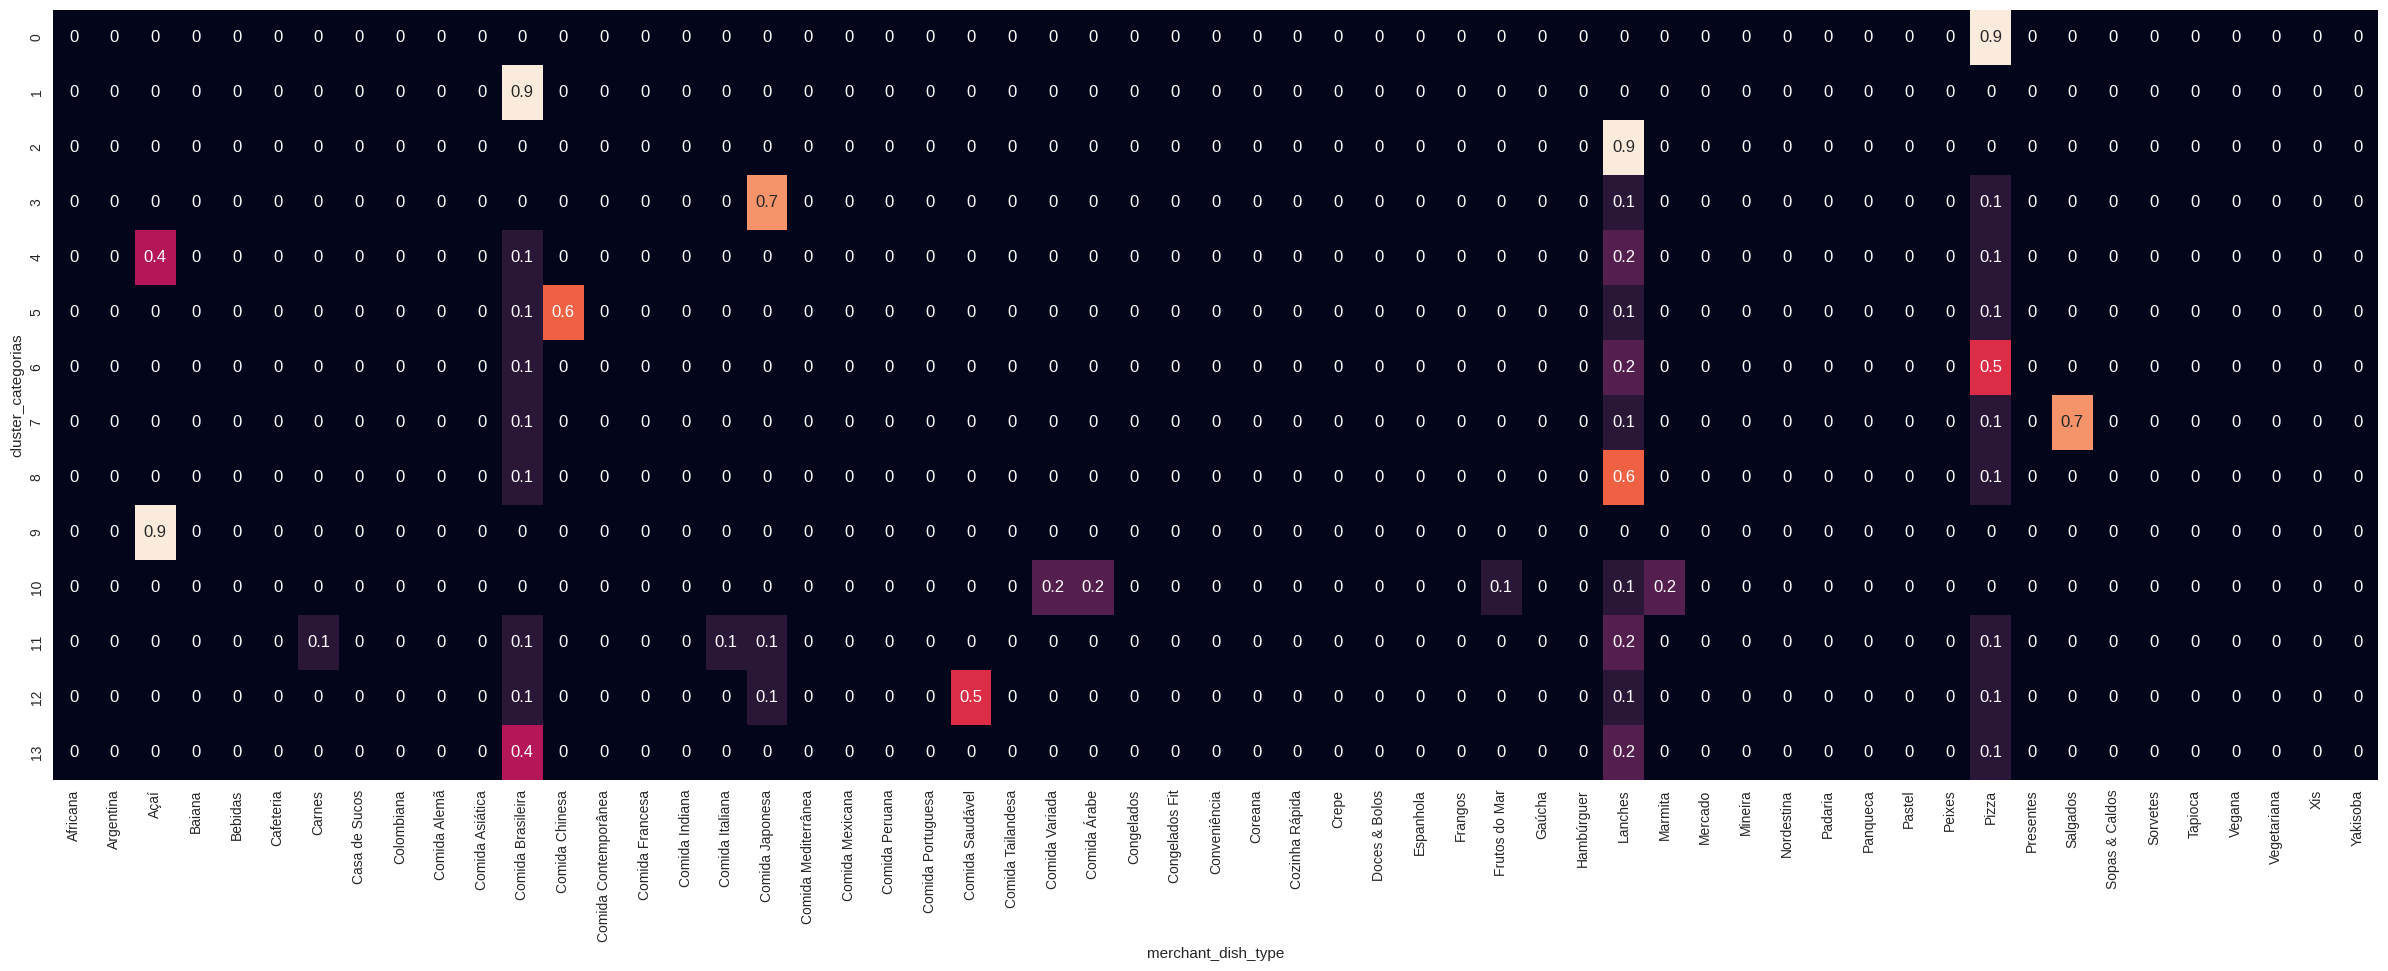

14 clusters x 14 categorias de comida:

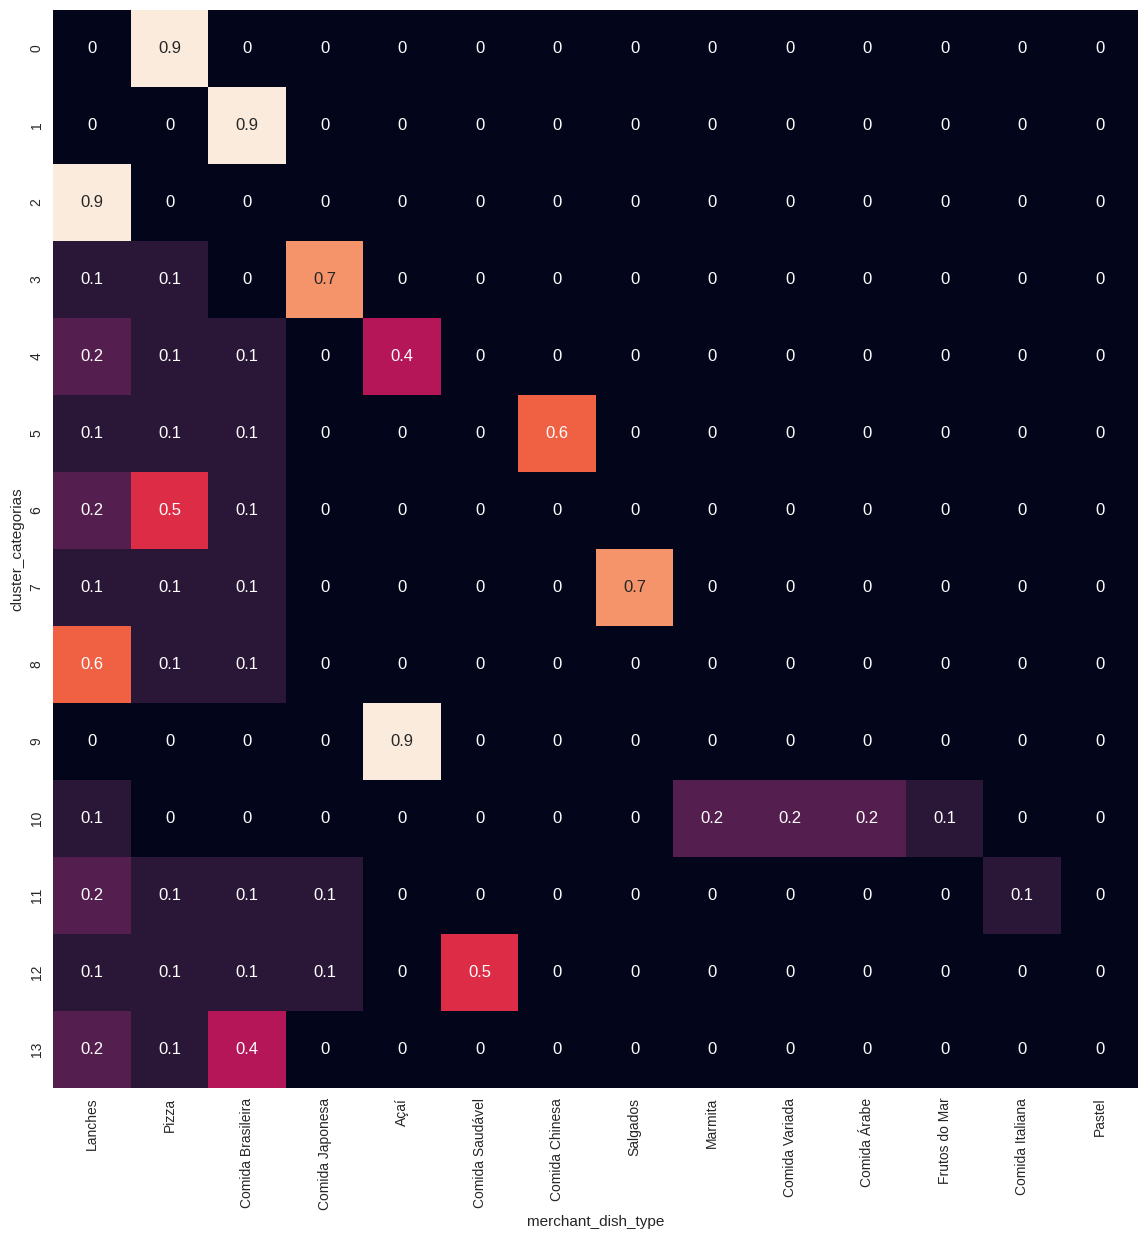

**<span style="color:blue"></span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crie uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
kmeans = KMeans(n_clusters=9,random_state=15)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=15)

In [ ]:
kmeans.labels_

array([0, 1, 8, ..., 6, 1, 0], dtype=int32)

In [ ]:
abt_seg_tipo_comida["cluster_categorias"]= kmeans.labels_

In [ ]:
abt_seg_tipo_comida.head()

merchant_dish_type,customer_id,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,...,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
abt_seg_tipo_comida["cluster_categorias"].value_counts()

,count
cluster_categorias,
8,6961
4,5707
6,4759
2,3939
1,3335
0,2306
3,1698
7,783
5,591


**<span style="color:blue"></span> `Q5`** Faça a avaliação do ajuste do KMeans utilizando o Mapa de Calor.

O que podemos concluir?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

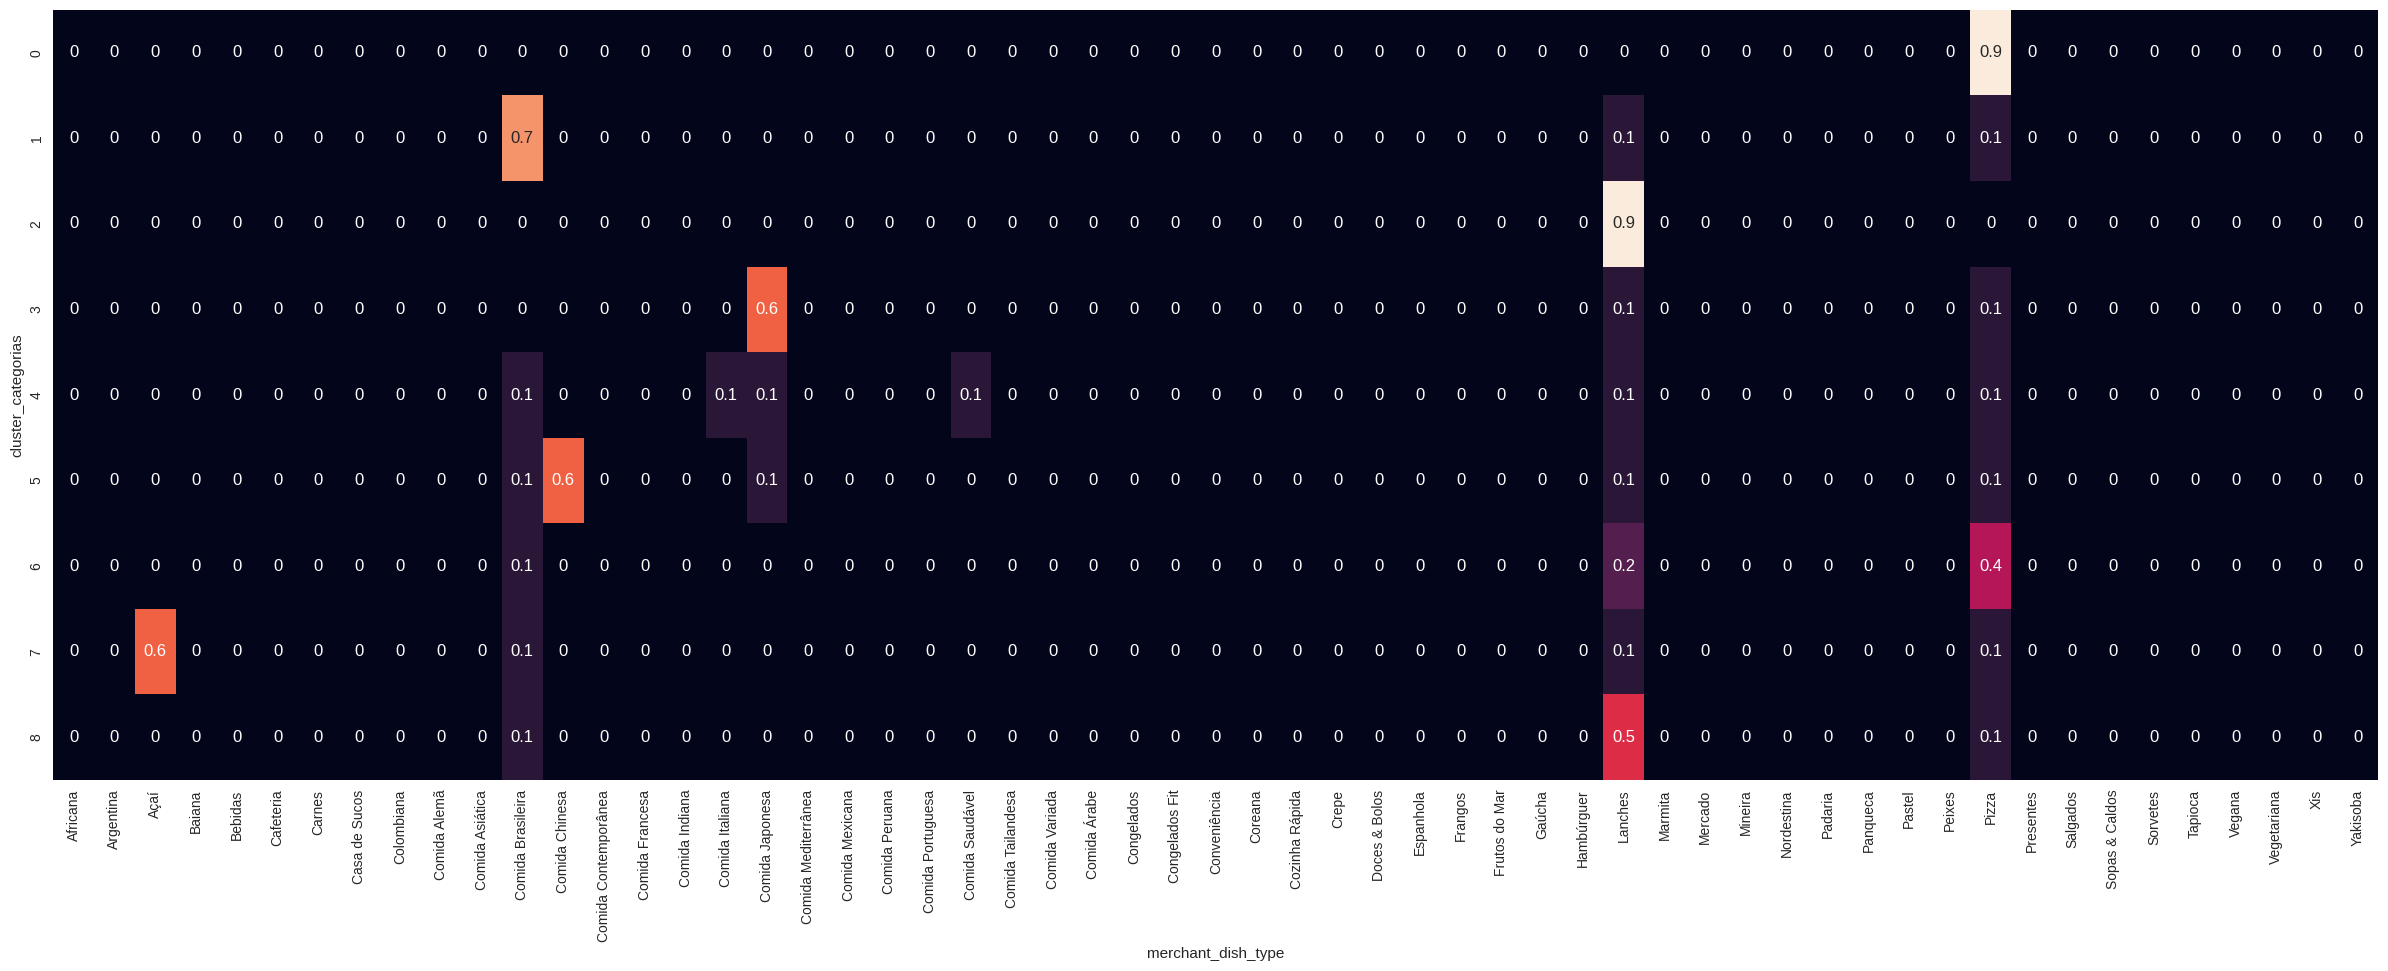

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(X.groupby(abt_seg_tipo_comida["cluster_categorias"]).mean().round(1),annot=True,cbar=False);

**<span style="color:blue">[RESPOSTA]:</span>**

O número de nove cluster mostra-se adequado pois em cada cluster tem pelo menos um tipo de comida com concentração de mais de 40% e com exceção dos clusteres 0 e 2 todos os demais compram mais de um tipo de comida. O cluster 4 é o com maior variedade de tipos de comida diferentes.

**<span style="color:blue"></span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo.
* Recupere as 9 features mais importantes.
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado.
* Faça uma análise do resultado obtido no mapa de calor.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
abt_seg_tipo_comida

merchant_dish_type,customer_id,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,...,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30074,fffc6d5755829710151aec9a2f9b7e38fc6157d6854260...,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
30075,fffca8befe314aa1b1bc4629875f0141689ec77b9e1a16...,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
30076,fffd4c0add1e365532304b76bad96c2a585bd15be92902...,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
30077,fffdc611548c91b0cbf436b5a7f9535e2ea6b221ccee50...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
clf = DecisionTreeClassifier()
X = abt_seg_tipo_comida.drop(['customer_id', 'cluster_categorias'], axis=1).copy()
y = abt_seg_tipo_comida['cluster_categorias']
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
pd.Series(clf.feature_importances_,index=X.columns.to_list()).sort_values(ascending=False).head(9)

,0
Lanches,0.365123
Pizza,0.285929
Comida Brasileira,0.141892
Comida Japonesa,0.096122
Açaí,0.050945
Comida Chinesa,0.039971
Comida Saudável,0.011370
Comida Italiana,0.001257
Marmita,0.000985


In [ ]:
top_features = pd.Series(clf.feature_importances_,index=X.columns.to_list()).sort_values(ascending=False).head(9).index.to_list()

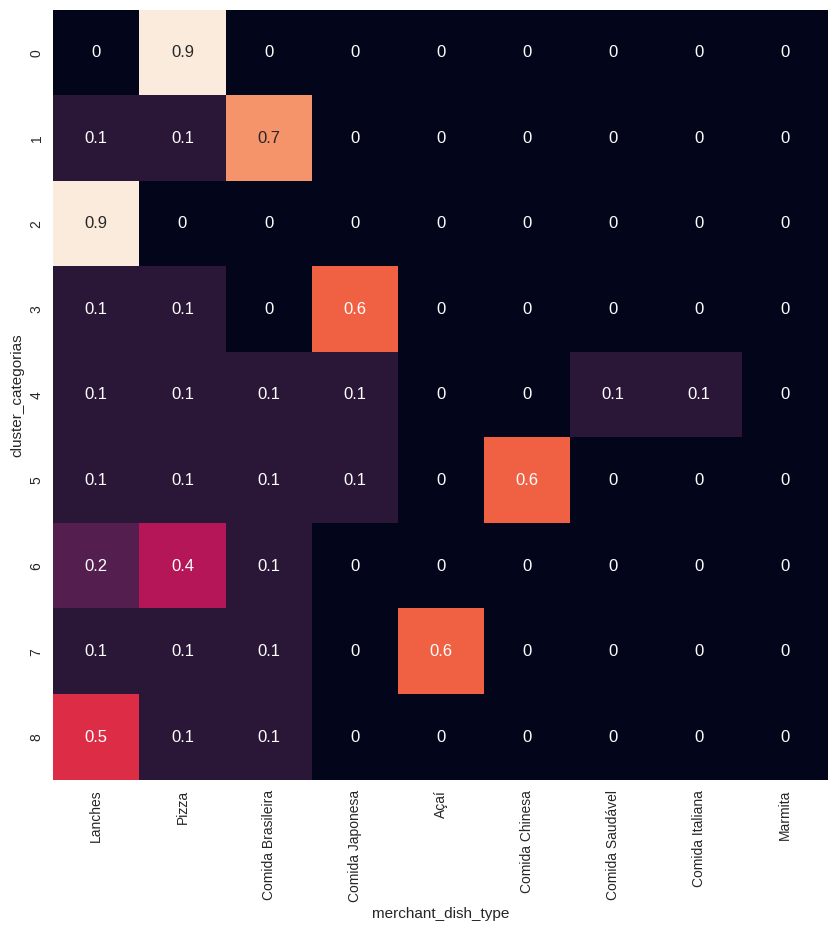

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.groupby(abt_seg_tipo_comida["cluster_categorias"])[top_features].mean().round(1),annot=True,cbar=False);

**<span style="color:blue">[RESPOSTA]:</span>**

o cluster 0 é composto de clientes que só compram pizza

o cluster 1 é composto predominantemente de cliente que compram comida Brasileira, mas também compram lanches e Pizza

o cluster 2 é composto de clientes que só compram lanches

o cluster 3 é composto predominantemente de cliente que compram comida Japonesa, mas também compram lanches e Pizza

o cluster 4 é o mais diversificado com clientes sem predominancia de compra de nenhum tipo de comida, mas que comprams lanches, Pizza, comida Brasileira, comida Japonesa, Comida Saudável e Comida Italiana.

o cluster 5 é composto predominantemente de cliente que compram comida Chinesa, mas também compram lanches, Pizza, comida Brasileira e comida Japonesa.

o cluster 6 é composto por clientes que compram lanches, Pizza e comida Brasileira, com destaque maior para Pizza

o cluster 7 é composto predominantemente de cliente que compram Açaí, mas também compram lanches, Pizza e comida Brasileira.

o cluster 8 é composto predominantemente de cliente que compram Lanches, mas também compram  Pizza e comida Brasileira.



# Segmentação por RFV

**<span style="color:blue"></span> `Q7`** Crie a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`.
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`.
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`.
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`.



In [ ]:
abt_rfv = (
    df_orders
    .groupby('customer_id')
    .agg(
        total_pedidos=('order_id', 'count'),
        total_receita=('order_total', 'sum')
    )
    .reset_index()
)
abt_rfv.head()

,customer_id,total_pedidos,total_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96


In [ ]:
abt_rfv.shape

(30079, 3)

**<span style="color:blue"></span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [ ]:
abt_rfv['rank_pct_pedidos'] = abt_rfv['total_pedidos'].rank(pct=True)
abt_rfv['rank_pct_receita'] = abt_rfv['total_receita'].rank(pct=True)
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723


In [ ]:
abt_rfv.shape

(30079, 5)

**<span style="color:blue"></span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

In [ ]:
X_abt_rfv = abt_rfv.drop('customer_id', axis=1).copy()
X_abt_rfv.head()

,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,6,293.70,0.375096,0.363426
1,6,345.18,0.375096,0.403404
2,7,385.56,0.415090,0.430583
3,2,103.20,0.161990,0.168855
4,3,153.96,0.228349,0.231723


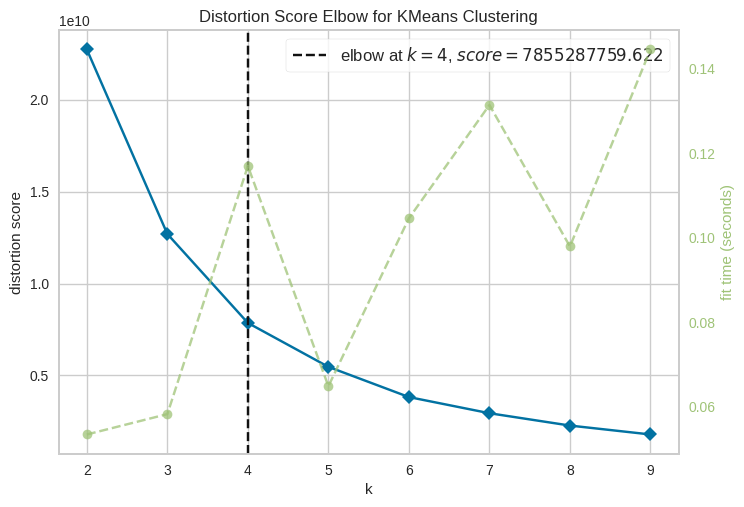

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=15)
visualizer_X_abt_rfv = KElbowVisualizer(kmeans, k=(2,10))
visualizer_X_abt_rfv.fit(X_abt_rfv)
visualizer_X_abt_rfv.show()

In [ ]:
X_abt_rfv_pct = None
X_abt_rfv_pct = abt_rfv.filter(["rank_pct_pedidos" ,"rank_pct_receita"]).copy()
X_abt_rfv_pct.head()

,rank_pct_pedidos,rank_pct_receita
0,0.375096,0.363426
1,0.375096,0.403404
2,0.415090,0.430583
3,0.161990,0.168855
4,0.228349,0.231723


In [ ]:
kmeans_rfv_pct = KMeans(n_clusters=4,random_state=15)
kmeans_rfv_pct.fit(X_abt_rfv_pct)

KMeans(n_clusters=4, random_state=15)

In [ ]:
kmeans_rfv_pct.labels_

array([3, 3, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
X_abt_rfv_pct["cluster_rfv"] = kmeans_rfv_pct.labels_
X_abt_rfv_pct.head()

,rank_pct_pedidos,rank_pct_receita,cluster_rfv
0,0.375096,0.363426,3
1,0.375096,0.403404,3
2,0.415090,0.430583,3
3,0.161990,0.168855,1
4,0.228349,0.231723,1


In [ ]:
X_abt_rfv_pct["cluster_rfv"].value_counts(normalize=True)

,proportion
cluster_rfv,
1,0.254762
3,0.251737
0,0.249842
2,0.243658


In [ ]:
X_abt_rfv_pct["cluster_rfv"].value_counts()

,count
cluster_rfv,
1,7663
3,7572
0,7515
2,7329


**<span style="color:blue"></span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
X_cluster_fv = abt_rfv.drop('customer_id', axis=1).copy()
X_cluster_fv.head()

,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,6,293.70,0.375096,0.363426
1,6,345.18,0.375096,0.403404
2,7,385.56,0.415090,0.430583
3,2,103.20,0.161990,0.168855
4,3,153.96,0.228349,0.231723


In [ ]:
kmeans_fv = KMeans(n_clusters=4,random_state=15)
kmeans_fv.fit(X_cluster_fv)

KMeans(n_clusters=4, random_state=15)

In [ ]:
X_cluster_fv["cluster_fv"] = kmeans_fv.labels_
X_cluster_fv.head()

,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita,cluster_fv
0,6,293.70,0.375096,0.363426,3
1,6,345.18,0.375096,0.403404,3
2,7,385.56,0.415090,0.430583,3
3,2,103.20,0.161990,0.168855,3
4,3,153.96,0.228349,0.231723,3


In [ ]:
abt_rfv['cluster_fv'] = X_cluster_fv['cluster_fv']
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855,3
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723,3


**<span style="color:blue"></span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


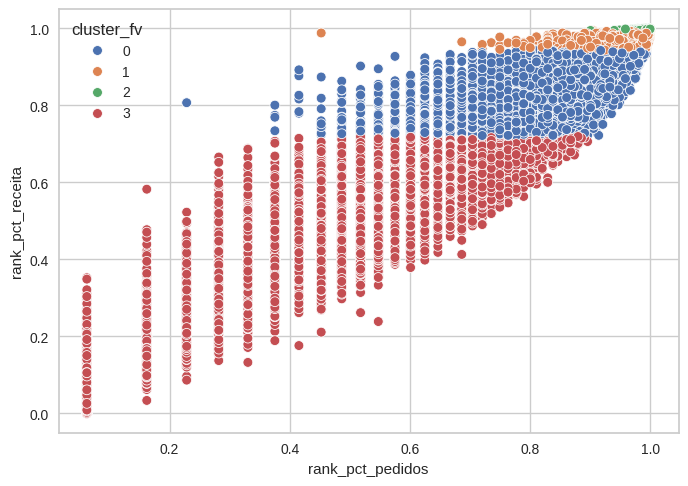

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=X_cluster_fv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep');

**<span style="color:blue"></span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

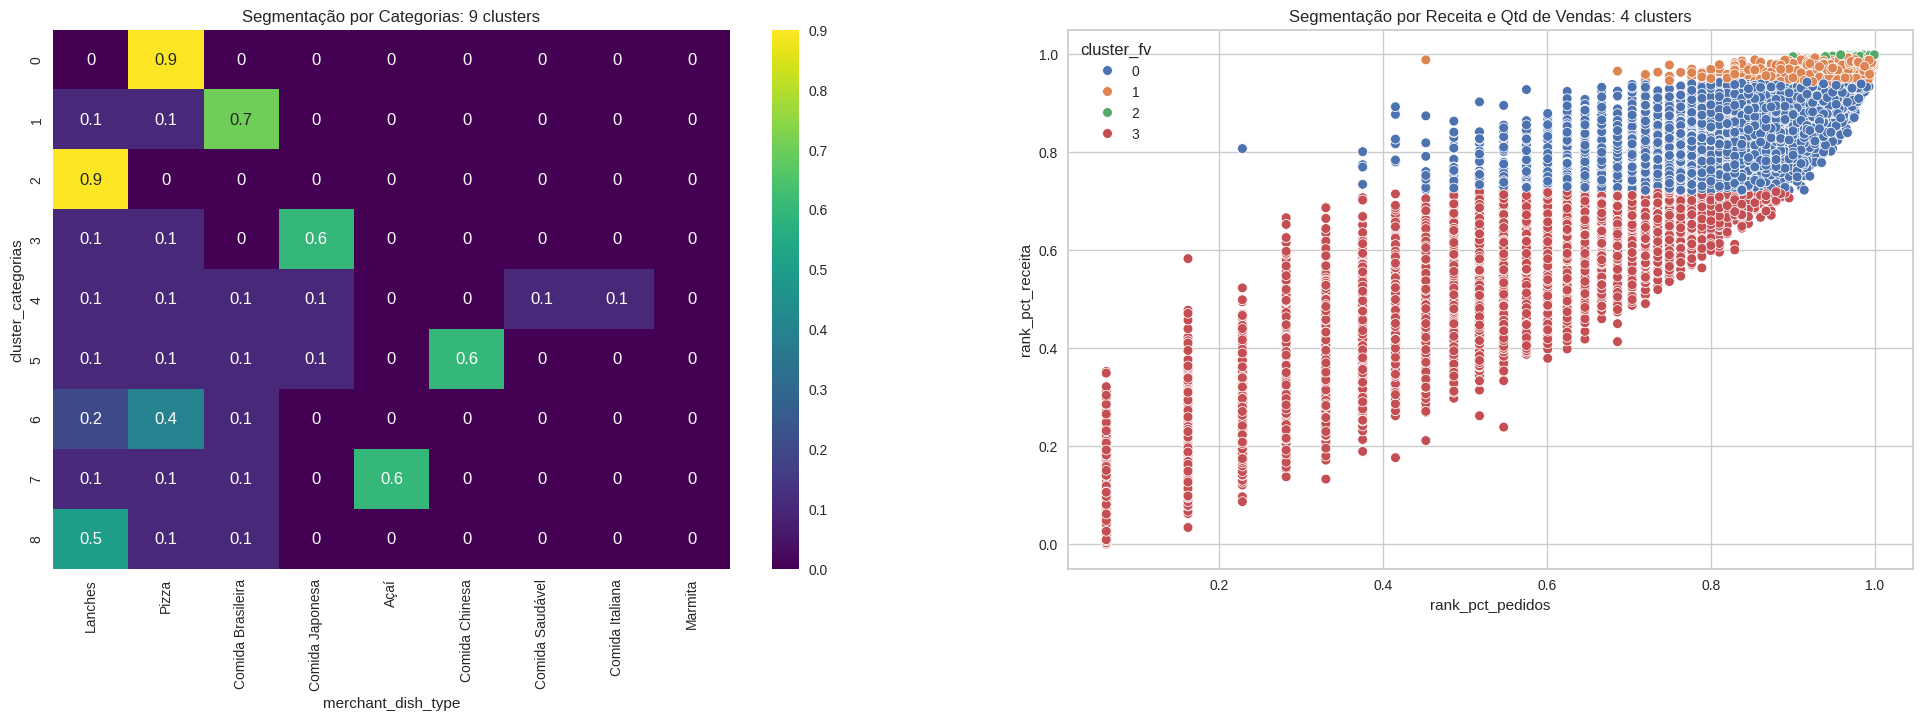

In [ ]:
fig, ax = plt.subplots(figsize=(24, 7), nrows=1, ncols=2)

ax[0].set_title('Segmentação por Categorias: 9 clusters');
sns.heatmap(X.groupby(abt_seg_tipo_comida["cluster_categorias"])[top_features].mean().round(1),ax=ax[0], cmap='viridis', annot=True);
ax[1].set_title('Segmentação por Receita e Qtd de Vendas: 4 clusters');
sns.scatterplot(data=abt_rfv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep', ax=ax[1]);

**<span style="color:blue"></span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

In [ ]:
abt_seg_tipo_comida.reset_index()
resultado_segmentacao = (
    abt_seg_tipo_comida
    .merge(abt_rfv, on='customer_id', how='left')
    .filter(['customer_id', 'cluster_categorias', 'cluster_fv'])
)


In [ ]:
resultado_segmentacao.head()

,customer_id,cluster_categorias,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,1,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,8,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,6,3
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,8,3


**<span style="color:blue"></span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

In [ ]:
resultado_analise = resultado_segmentacao.groupby(['cluster_categorias', 'cluster_fv']).count().unstack()
resultado_analise.sum(axis=1).sum()

30079.0

In [ ]:
resultado_analise.head(50)

customer_id                     
cluster_fv                   0      1     2       3
cluster_categorias                                 
0                        177.0   12.0   1.0  2116.0
1                        680.0  166.0  10.0  2479.0
2                        330.0   23.0   NaN  3586.0
3                        312.0   80.0   2.0  1304.0
4                       1841.0  632.0  91.0  3143.0
5                         67.0    7.0   NaN   517.0
6                       1309.0  191.0  18.0  3241.0
7                         94.0    7.0   1.0   681.0
8                       1875.0  419.0  41.0  4626.0

In [ ]:
resultado_analise["total"] = resultado_analise.sum(axis=1)

In [ ]:
resultado_analise.head(50)

customer_id                        total
cluster_fv                   0      1     2       3        
cluster_categorias                                         
0                        177.0   12.0   1.0  2116.0  2306.0
1                        680.0  166.0  10.0  2479.0  3335.0
2                        330.0   23.0   NaN  3586.0  3939.0
3                        312.0   80.0   2.0  1304.0  1698.0
4                       1841.0  632.0  91.0  3143.0  5707.0
5                         67.0    7.0   NaN   517.0   591.0
6                       1309.0  191.0  18.0  3241.0  4759.0
7                         94.0    7.0   1.0   681.0   783.0
8                       1875.0  419.0  41.0  4626.0  6961.0

In [ ]:
resultado_analise.loc["total_fv"] = resultado_analise.sum(axis=0)

In [ ]:
resultado_analise.head(50)

customer_id                            total
cluster_fv                   0       1      2        3         
cluster_categorias                                             
0                        177.0    12.0    1.0   2116.0   2306.0
1                        680.0   166.0   10.0   2479.0   3335.0
2                        330.0    23.0    NaN   3586.0   3939.0
3                        312.0    80.0    2.0   1304.0   1698.0
4                       1841.0   632.0   91.0   3143.0   5707.0
5                         67.0     7.0    NaN    517.0    591.0
6                       1309.0   191.0   18.0   3241.0   4759.0
7                         94.0     7.0    1.0    681.0    783.0
8                       1875.0   419.0   41.0   4626.0   6961.0
total_fv                6685.0  1537.0  164.0  21693.0  30079.0

**<span style="color:blue"></span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.

**[RESPOSTA]:**

**1.   Distribuição dos Clientes por Cluster de Categorias e frequência de vendas**

*   O cluster 8 apresenta a maior concentração de clientes 6961 com destaque para o cluster 3 de frequencia de vendas (4626 clientes)

*   O Cluster 4 também apresenta um número expressivo de clientes, especialmente no grupo 3, com 3143 clientes.

*   Todos os cluster de categoria tem maior concentração de clientes no cluster 3 de frequencia de venda

*   57% dos clientes estão nos cluster 8, 4 e 6, podemos concluuir que este grupo tem preferencia por, Lanches e Pizzas mas também compram comida Brasileira, Japonesa, Saudável e Italiana

*   72% dos clientes estão concentrados no cluster 3 de frequencia de vendas (21693)

*   O Cluster 5 é ode menor em concentração de cliente, apenas 591.   

**2.  Implicações para Estratégias de Negócio**

*   Cluster_fv 3, esses são os clientes mais engajados, sendo importantes para estratégias de fidelização. Como a maior parte dos clientes está nesse grupo, é essencial oferecer programas de recompensas e benefícios para mantê-los engajados.

*   Clusters com baixa frequência Cluster_fv  1 e 2, esses clientes compram com menos recorrência e podem precisar de incentivos para aumentar a retenção, como promoções específicas ou campanhas de remarketing.

*   Clusters mais representativos (Cluster 8, 4 e 6): Como esses grupos concentram a maior parte dos clientes, podem ser alvos de segmentações mais refinadas para entender melhor o comportamento e criar ofertas mais personalizadas.





